质量为 1.1 倍太阳质量的恒星的表面温度为: 5772.00 K 
对应的峰值波长为: 501.91 1 / K nm
质量为 1.2 倍太阳质量的恒星的表面温度为: 5799.62 K 
对应的峰值波长为: 499.52 1 / K nm
质量为 1.5 倍太阳质量的恒星的表面温度为: 5827.10 K 
对应的峰值波长为: 497.16 1 / K nm
质量为 2.0 倍太阳质量的恒星的表面温度为: 5854.43 K 
对应的峰值波长为: 494.84 1 / K nm


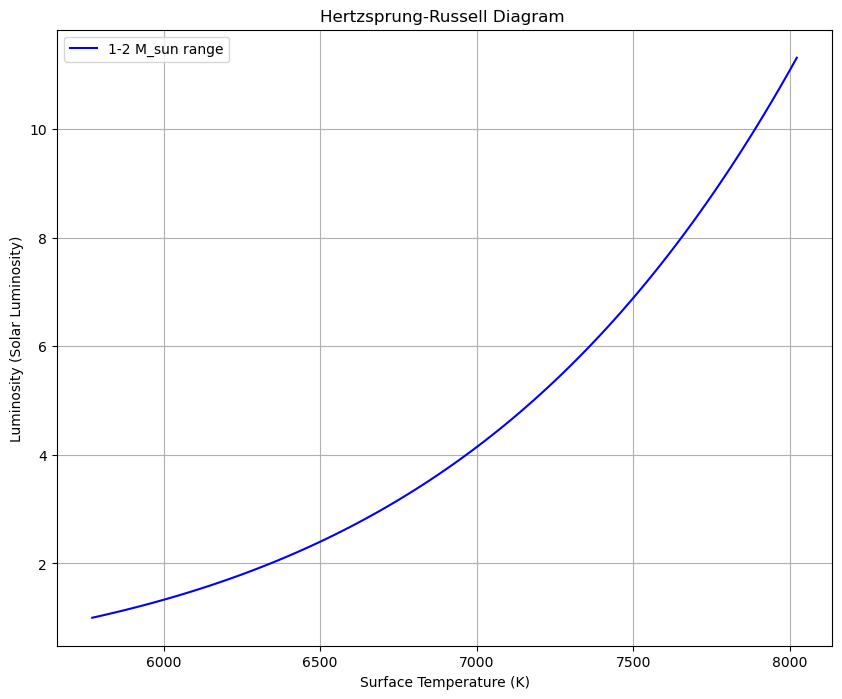

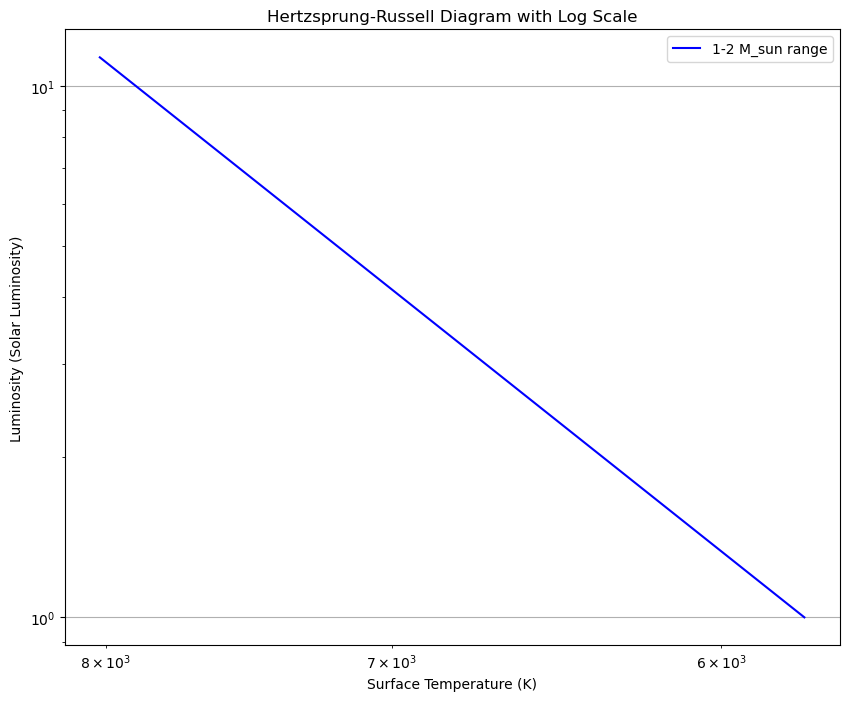

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u

# 定义常量
M_sun = const.M_sun
R_sun = const.R_sun
L_sun = const.L_sun
sigma_sb = const.sigma_sb
T_sun = 5778 * u.K
# 维恩位移常数
b = 2.897 * 10**-3  # m·K

# 定义恒星质量范围
masses = np.linspace(1, 2, 100) * M_sun

def luminosity(mass):
    return (mass / M_sun)**3.5 * L_sun

# 计算相应的表面温度
def surface_temperature(mass):
    radius = (mass / M_sun)**0.8 * R_sun
    luminosity = (mass / M_sun)**3.5 * L_sun
    return ((luminosity / (4 * np.pi * radius**2 * sigma_sb))**0.25).to(u.K)

temperatures = surface_temperature(masses)# 计算不同质量恒星的表面温度
luminosities = luminosity(masses)  # 计算不同质量恒星的光度
peak_wavelengths = [b / temp for temp in temperatures]# 计算峰值波长

# 打印结果
for mass, temp, wavelength in zip([1.1, 1.2, 1.5, 2.0], temperatures, peak_wavelengths):
    print(f"质量为 {mass} 倍太阳质量的恒星的表面温度为: {temp:.2f} ")
    print(f"对应的峰值波长为: {wavelength * 10**9:.2f} nm")  # 将波长转换为纳米
   
# 绘制HR图
plt.figure(figsize=(10, 8))
plt.plot(temperatures.value, (luminosities / L_sun).value, label='1-2 M_sun range', color='blue')
plt.xlabel('Surface Temperature (K)')
plt.ylabel('Luminosity (Solar Luminosity)')
plt.title('Hertzsprung-Russell Diagram ')
plt.grid(True)
plt.legend()
plt.show()


# 绘制HR图
plt.figure(figsize=(10, 8))
plt.loglog(temperatures.value, (luminosities / L_sun).value, label='1-2 M_sun range', color='blue')
plt.xlabel('Surface Temperature (K)')
plt.ylabel('Luminosity (Solar Luminosity)')
plt.title('Hertzsprung-Russell Diagram with Log Scale')
plt.grid(True)
plt.legend()
plt.gca().invert_xaxis()
plt.show()
